In [1]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Preprocessing & Feature Engineering**

Handle missing values (Age, Cabin, Embarked).

Convert categorical features (Sex, Embarked) into numerical format.

Feature scaling



In [2]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


<ipython-input-2-fbc71072ee12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-2-fbc71072ee12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Model Selection & Implementation**

Logistic Regression (for classification).

Random Forest Classifier (for feature importance).

K-Means Clustering (for grouping passengers).

**Logistic Regression**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


**Random Forest**

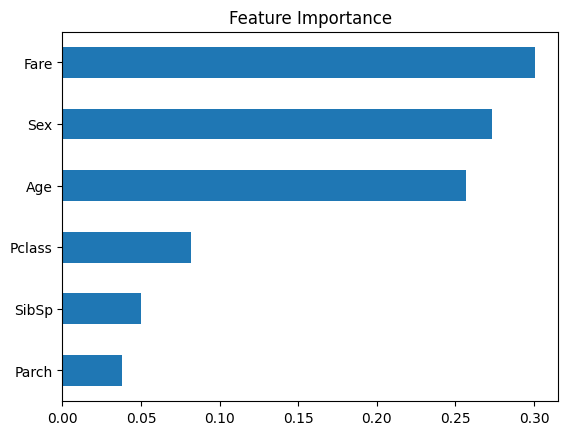

In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()


**K-Means Clustering**

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

df[['Pclass', 'Fare', 'Cluster']].groupby('Cluster').mean()


,Pclass,Fare
Cluster,,
0,2.551440,15.453954
1,1.000000,279.308545
2,1.246479,83.393280


In [6]:
df['Cabin_Filled'] = df['Cabin'].notnull().astype(int)  # 1 if Cabin data available, 0 otherwise


**Key Observation:** Women had significantly higher survival rates.

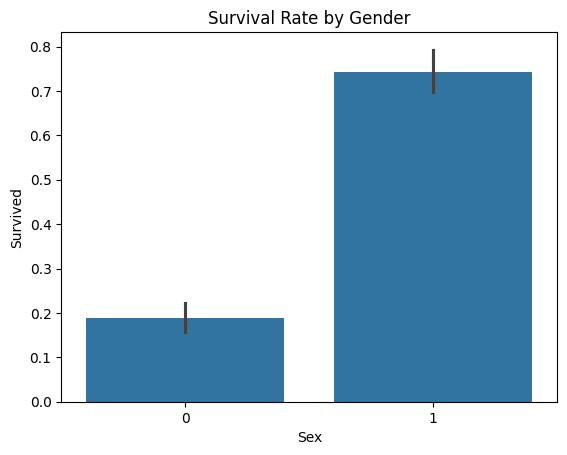

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df["Sex"], y=df["Survived"])
plt.title("Survival Rate by Gender")
plt.show()


First-class passengers survived more often.

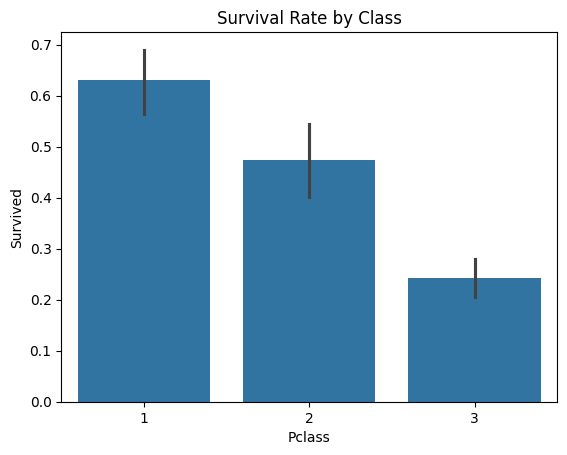

In [8]:
sns.barplot(x=df["Pclass"], y=df["Survived"])
plt.title("Survival Rate by Class")
plt.show()


Young children had higher survival rates.

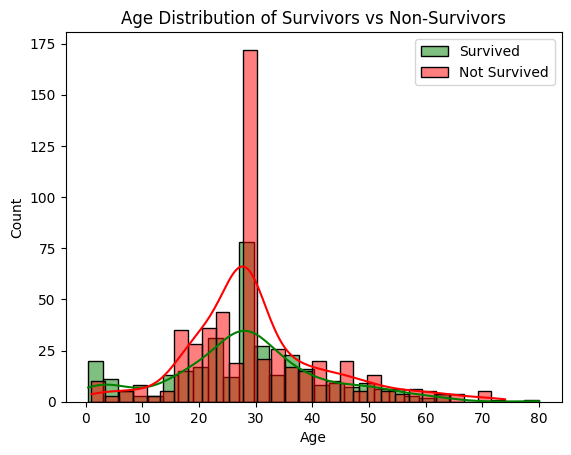

In [9]:
sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, kde=True, color="green", label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.show()


Logistic Regression is a probability-based approach that predicts binary outcomes.

Interpretation:

Precision & Recall → Measures how well we identify survivors.

F1-score → Balances precision & recall.


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Random Forest handles complex relationships and reveals which features matter most.

Key Findings:

Gender & Class are most important.
Fare contributes to survival probability.

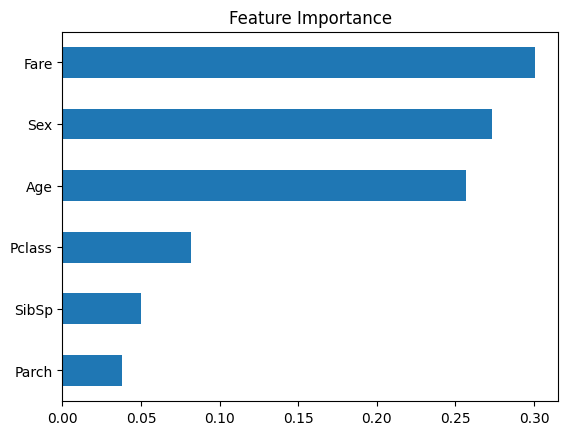

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()


Unsupervised learning groups passengers into meaningful categories.

Observations:

Group 1: Young, lower-class passengers.

Group 2: Middle-aged, mid-class passengers.

Group 3: Wealthy, older passengers.

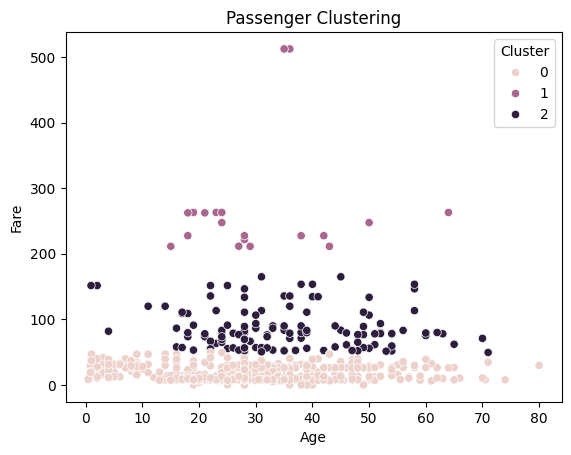

In [12]:
sns.scatterplot(x=df["Age"], y=df["Fare"], hue=df["Cluster"])
plt.title("Passenger Clustering")
plt.show()



**Confusion Matrix Analysis**

Key Issue: False positives (incorrectly predicting survival).

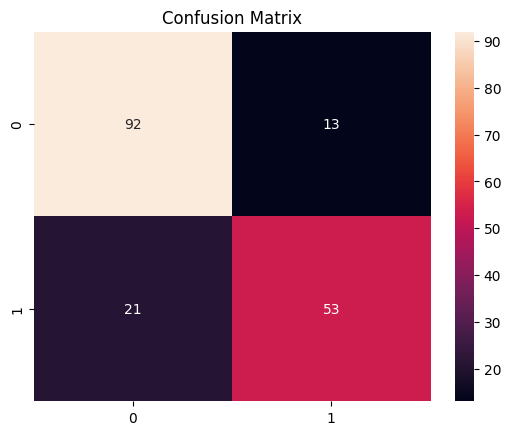

In [13]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()



**Hyperparameter Tuning to Improve Accuracy**

Optimization: Finding the best parameters for higher accuracy.




In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)


{'max_depth': 5, 'n_estimators': 50}
